In [ ]:
import pandas as pd
import numpy as np

## 1.  Import the package to help with following analysis process

In [ ]:
# upload the step count data and store it into dataframe
df = pd.read_csv('person1-step-data.csv',index_col = 1,parse_dates=True)

## 2. Upload the data and change the datatype in the cvs file to the datatype of datetime.

When transfer the Date's datatype to datetime, it really help us to group the data by years or months and bring a huge improvement in efficient aspect. 

In [ ]:
# observe the data in the df
df

,Source,Hour,Count
Date,,,
2014-12-07,Person1 iPhone SE,8,13
2014-12-07,Person1 iPhone SE,8,13
2014-12-07,Person1 iPhone SE,8,1
2014-12-07,Person1 iPhone SE,8,9
2014-12-07,Person1 iPhone SE,8,15
...,...,...,...
2021-09-22,Person1 iPhone SE,17,1241
2021-09-22,Person1 iPhone SE,17,1212
2021-09-22,Person1 iPhone SE,18,808


## 3. To check and observe the nature of data in the dataframe we create

We try to do the operation about examin whether the null values exsits in the dataframe

In [ ]:
# to check whether exist NULL/missing value in the dataframe
df.isnull().any().any()

False

In all the cells in the dataframe,there do not have the NULL value

In [ ]:
# observe the data in count column
df["Count"].describe()

count    183787.000000
mean         79.791558
std         358.099285
min           1.000000
25%           6.000000
50%          17.000000
75%          35.000000
max       88359.000000
Name: Count, dtype: float64

To get the math feature and range of these data in the dataframe, and check whether there are any outliers should be cleaned. From above, it result is pretty normal,though the max step count is reach 88359 in one certain day, however the data is puasible.

## 4. we integrate the data and resample the data by months

In [ ]:
df = df.drop(columns=['Hour'])
df = df.resample('M').sum()
df

,Count
Date,
2014-12-31,111590
2015-01-31,131321
2015-02-28,106851
2015-03-31,101621
2015-04-30,91726
...,...
2021-05-31,518898
2021-06-30,406440
2021-07-31,360565


The driving question is try to find whether the tester is more active in the last 12 months than the 12 months before that. However, we find for 2014 and 2021, the data is imcompleted, there are only one month and nine months data relatively in 2214 and 2021. Then we try to drop these data belong to 2014 and 2021, and analysis the completed data from 2015 to 2020 **(6 years)**

In [ ]:
df_6_years = df['2015':'2020']
df_6_years

,Count
Date,
2015-01-31,131321
2015-02-28,106851
2015-03-31,101621
2015-04-30,91726
2015-05-31,177845
...,...
2020-08-31,92018
2020-09-30,86170
2020-10-31,88564


Only extract the data from 2015 to 2020

**Calculalte the total step count for each month by resampling skill**

In [ ]:
df_6_years = df_6_years.resample('M').sum()
df_6_years

,Count
Date,
2015-01-31,131321
2015-02-28,106851
2015-03-31,101621
2015-04-30,91726
2015-05-31,177845
...,...
2020-08-31,92018
2020-09-30,86170
2020-10-31,88564



## 5. Plot the data and check the difference between 12 months and the 12 months before it

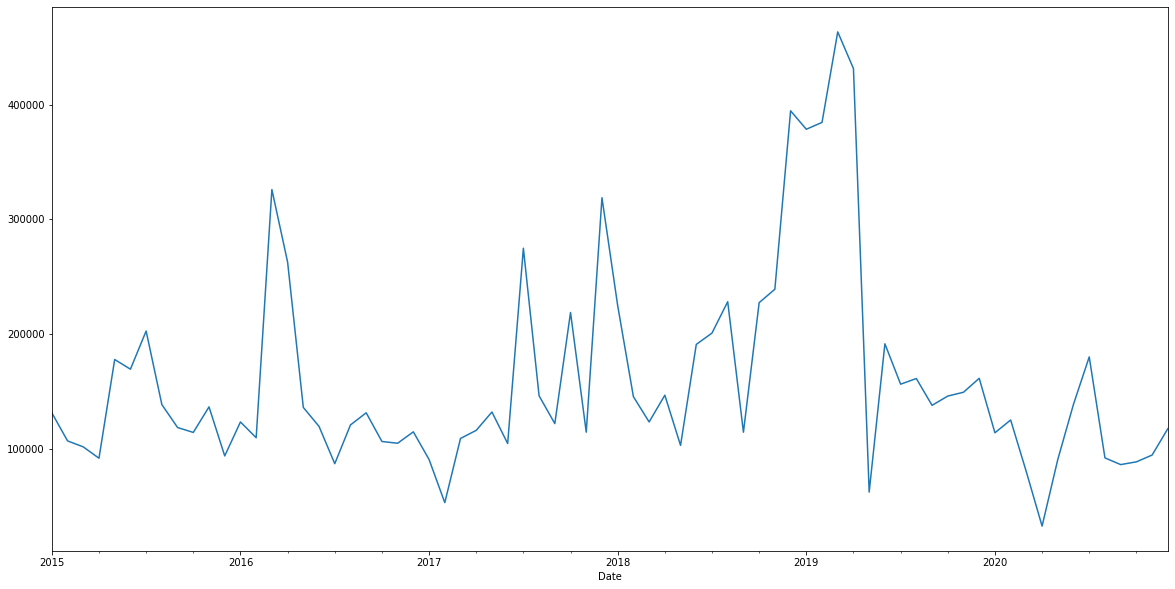

In [ ]:
import matplotlib.pyplot as plt
df_6_years['Count'].plot(figsize = (20,10))

We the result is depend on which two 12 months we are choose
**For 2015 and 2016, 2016 is more active than the 2015**. ;
**For 2016 and 2017, it seems the active level keep the same** ;
**For 2017 and 2018, 2018 is much more active then 2017**
.
.
.
